In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data.npy'


data = np.load(file_path)


print(data)

Mounted at /content/drive
[ 40.25196507  39.53010126  37.7992167   37.32837052  28.65394346
  29.69747547  26.10881978  27.83802602  22.99054421  25.80112967
  21.29795526  19.91155621  14.96131425  11.47430672  16.95134087
  13.78849326   9.82605161   6.51423783   7.28107882   4.71364215
   0.82726539   2.0547798    1.75589251   4.69110905  -3.1080814
   6.5508178    9.30439077  -5.9567694    2.87594962   3.1993877
  -2.70786354   2.15378132  -1.77644948  -5.11557224  -4.43062279
   6.25451526   1.9854139    7.74342429  -0.75124188   4.43658355
   2.96815869   1.56463746   0.77572103   6.78279848  -0.71535178
   2.83930294   0.35701732 -14.02823175   2.74610814  -8.92342079
  -5.25805964  -5.91984033 -11.23785323 -11.91938329  -4.2483209
  -0.19964379  -9.63227683 -13.30314598 -13.12628213  -7.21216734
  -6.38891745  -0.4667489   -8.21628152  -3.07657489 -19.52390961
  -9.6384843    4.01358254  -0.04798927   6.13528941   0.47146013
   2.08633153  10.53650805   0.19410599  -1.47248443 

In [ ]:
x_values = np.linspace(-0.5, 12.5, len(data))

In [ ]:

train_x, test_x, train_y, test_y = train_test_split(x_values, data, test_size=0.2, random_state=23, shuffle=True)

print("Training data shape:", train_y)
print("Testing data shape:", test_y)

Training data shape: [ 10.05409648   2.87594962  22.99054421  19.91155621  -3.07657489
  28.65394346 -11.91938329  29.69747547   7.27235385  24.44557776
  20.65273966   4.69110905  27.83802602  -6.38891745  -5.9567694
   2.33812888   7.28107882  -0.4667489  -14.02823175   9.82605161
  12.94164738   6.37295172 -11.23785323  -5.25805964   0.35701732
  -4.43062279  24.53832675   8.79312464   3.21795311  40.25196507
  16.95134087  -2.70786354  17.39972088  -0.75124188   1.75589251
  11.47430672  -9.63227683  -1.77644948   6.25451526  -0.71535178
  21.29795526  37.7992167   15.27407037  18.69963466 -13.12628213
   2.08633153   6.78279848  39.53010126  -9.6384843    1.9854139
  13.78849326  13.01264151  -7.21216734  -5.11557224   4.71364215
 -13.30314598  -8.21628152   1.56463746   2.74610814   2.0547798
   7.09980433 -19.52390961   0.47146013   9.22295082   4.01358254
  -8.92342079  14.96131425   2.83930294  26.10881978  -5.91984033
   6.5508178    7.30636817   4.43658355   9.45267898   4.8

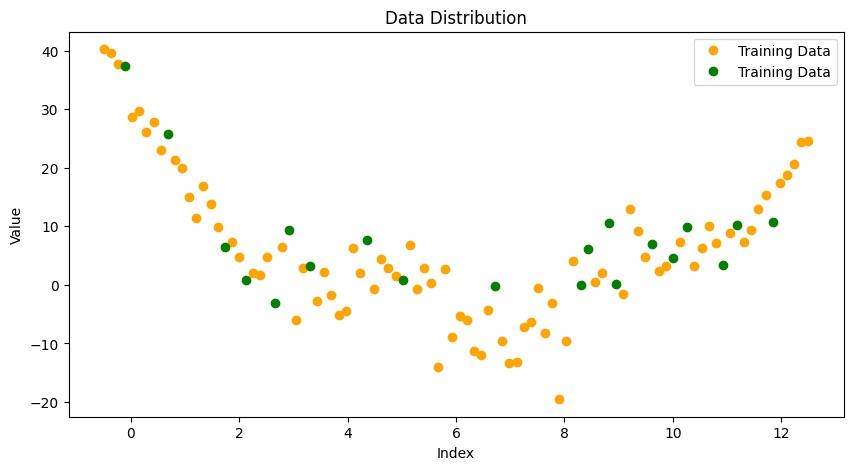

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_x, train_y, 'o', color='orange', label='Training Data')
plt.plot(test_x, test_y, 'o', color='green', label='Training Data')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Data Distribution")
plt.legend()
plt.show()

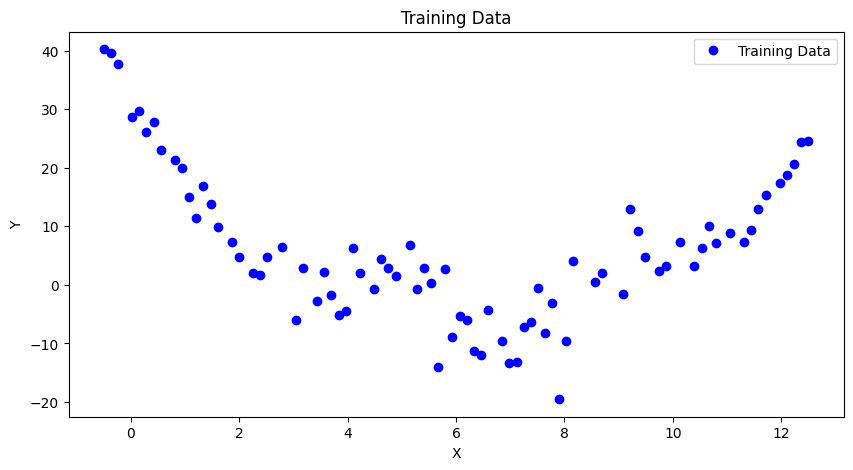

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_x, train_y, 'o', color='blue', label='Training Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.legend()
plt.show()

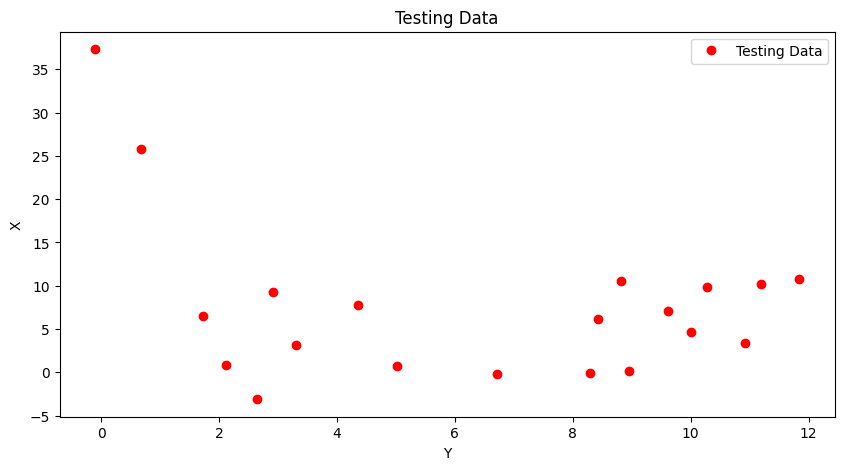

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(test_x, test_y, 'o', color='red', label='Testing Data')
plt.xlabel("Y")
plt.ylabel("X")
plt.title("Testing Data")
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()


train_x_scaled = scaler.fit_transform(train_x.reshape(-1, 1))



test_x_scaled = scaler.transform(test_x.reshape(-1, 1))



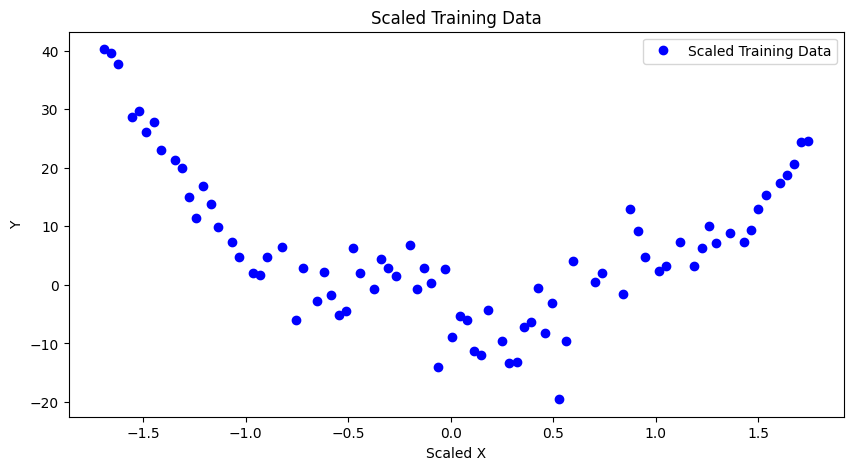

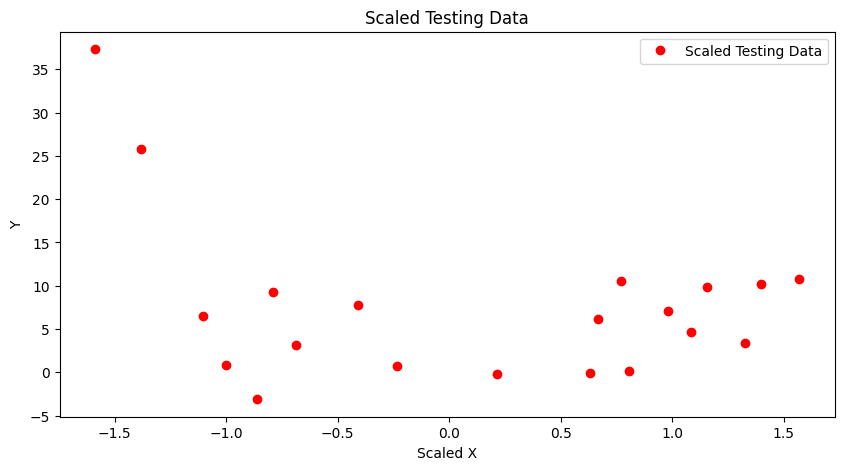

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_x_scaled, train_y, 'o', color='blue', label='Scaled Training Data')
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.title("Scaled Training Data")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_x_scaled, test_y, 'o', color='red', label='Scaled Testing Data')
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.title("Scaled Testing Data")
plt.legend()
plt.show()

In [ ]:
def linear_regression(x, y, learning_rate=0.1, iterations=2000):

    m = len(y)
    x = np.c_[np.ones((m, 1)), x]
    n = x.shape[1]
    beta = np.zeros(n)

    for _ in range(iterations):
        predictions = x.dot(beta)
        error = predictions - y  # Use signed errors instead of absolute
        gradient = (2/m) * x.T.dot(error)  # For MSE
        beta -= learning_rate * gradient

    return beta


In [ ]:
def predict(x, beta):
    m = len(x)
    x = np.c_[np.ones((m, 1)), x]
    return x.dot(beta)


In [ ]:
beta = linear_regression(train_x_scaled, train_y)
predictions = predict(test_x_scaled, beta)
predictions2 = predict(train_x_scaled, beta)

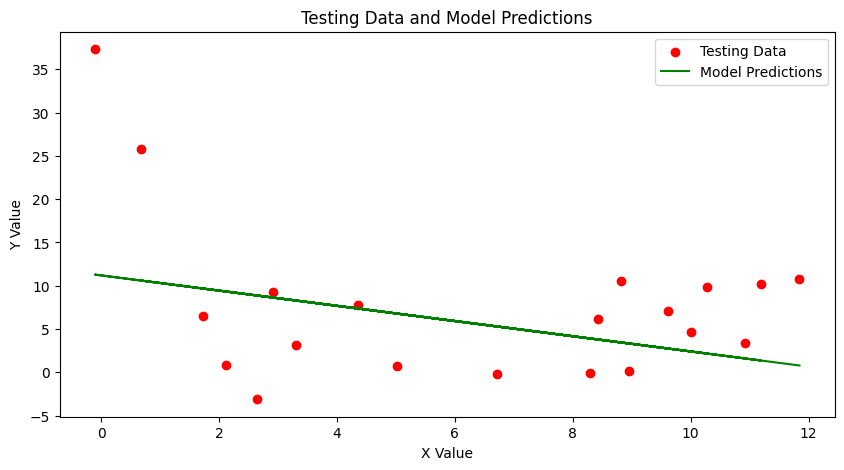

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(test_x, test_y, color='red', label='Testing Data')
plt.plot(test_x, predictions, color='green', label='Model Predictions')
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Testing Data and Model Predictions")
plt.legend()
plt.show()

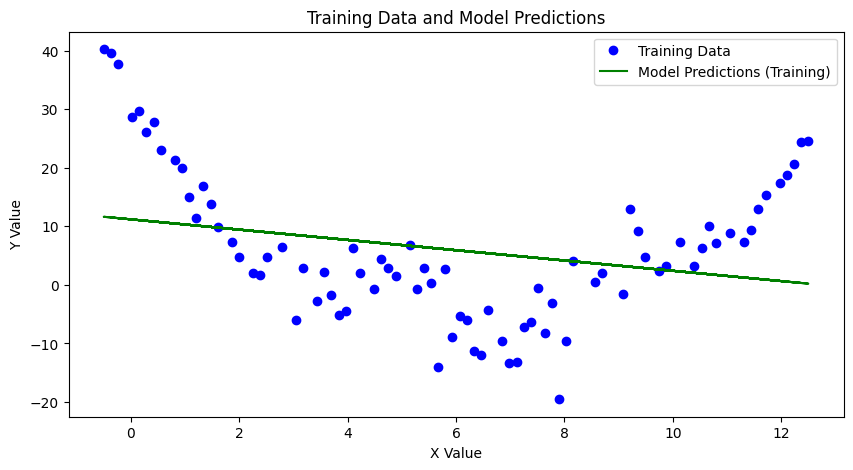

In [ ]:

train_predictions = predict(train_x_scaled, beta)



plt.figure(figsize=(10, 5))
plt.plot(train_x, train_y, 'o', color='blue', label='Training Data')
plt.plot(train_x, train_predictions, color='green', label='Model Predictions (Training)')
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Training Data and Model Predictions")
plt.legend()
plt.show()

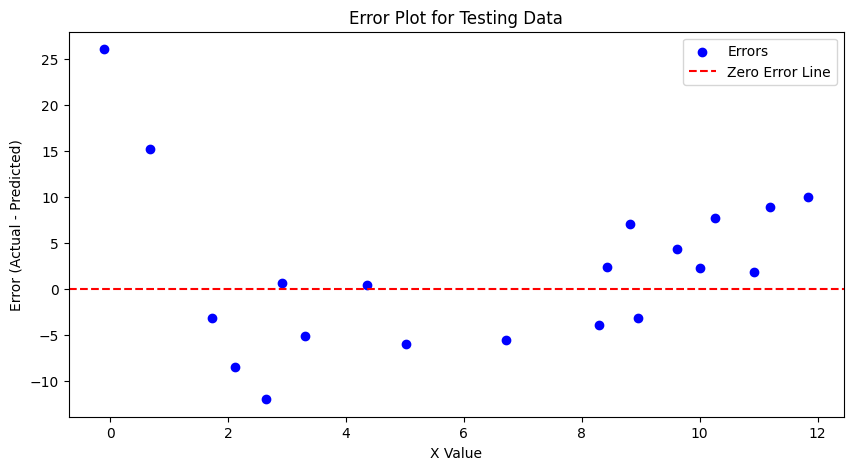

In [ ]:

errors = test_y - predictions


plt.figure(figsize=(10, 5))
plt.scatter(test_x, errors, color='blue', label='Errors')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel("X Value")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Error Plot for Testing Data")
plt.legend()
plt.show()

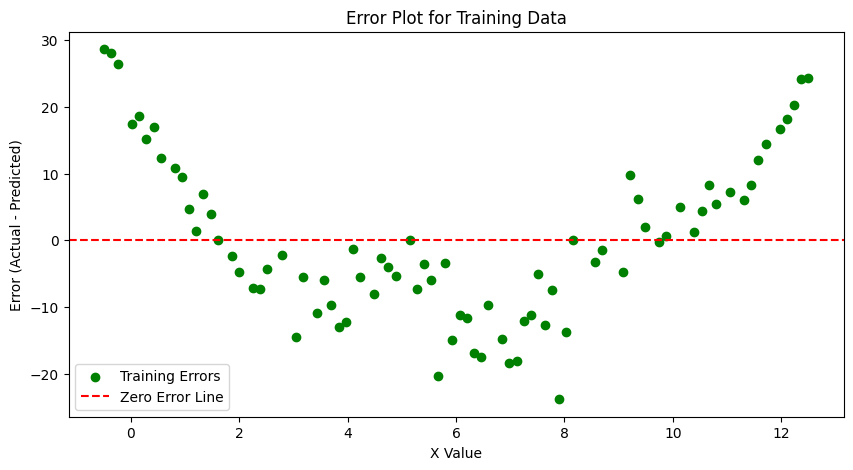

In [ ]:

train_errors = train_y - predictions2

plt.figure(figsize=(10, 5))
plt.scatter(train_x, train_errors, color='green', label='Training Errors')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel("X Value")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Error Plot for Training Data")
plt.legend()
plt.show()

In [ ]:
# For Testing Data
print(f"Mean Absolute Error (Testing): {mean_absolute_error(test_y, predictions)}")
print(f"Mean Squared Error (Testing): {mean_squared_error(test_y, predictions)}")
print(f"R-squared (Testing): {r2_score(test_y, predictions)}")

# For Training Data
print(f"Mean Absolute Error (Training): {mean_absolute_error(train_y, train_predictions)}")
print(f"Mean Squared Error (Training): {mean_squared_error(train_y, train_predictions)}")
print(f"R-squared (Training): {r2_score(train_y, train_predictions)}")

Mean Absolute Error (Testing): 6.697378274228107
Mean Squared Error (Testing): 78.66196506553591
R-squared (Testing): 0.06320655909365058
Mean Absolute Error (Training): 9.88696964432948
Mean Squared Error (Training): 148.47451791855013
R-squared (Training): 0.06925644815682852


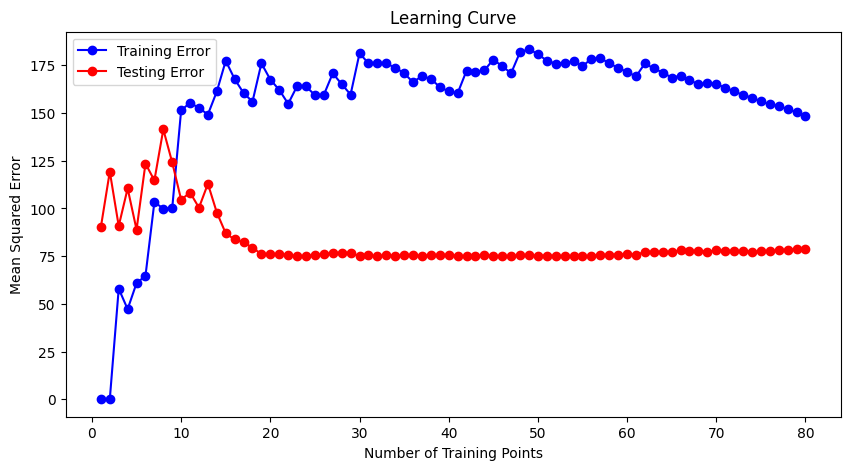

In [ ]:
train_errors = []
test_errors = []
subset_sizes = range(1, len(train_x) + 1)  # Training with 1, 2, ..., N points

for size in subset_sizes:
    # Select a subset of the training data
    subset_x = train_x[:size]
    subset_y = train_y[:size]

    # Scale the subset
    subset_x_scaled = scaler.fit_transform(subset_x.reshape(-1, 1))

    # Train the model on the subset
    beta = linear_regression(subset_x_scaled, subset_y, iterations=100)

    # Make predictions
    train_predictions = predict(subset_x_scaled, beta)
    test_predictions = predict(test_x_scaled, beta)

    # Calculate errors
    train_errors.append(mean_squared_error(subset_y, train_predictions))
    test_errors.append(mean_squared_error(test_y, test_predictions))

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(subset_sizes, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(subset_sizes, test_errors, label='Testing Error', marker='o', color='red')
plt.xlabel('Number of Training Points')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

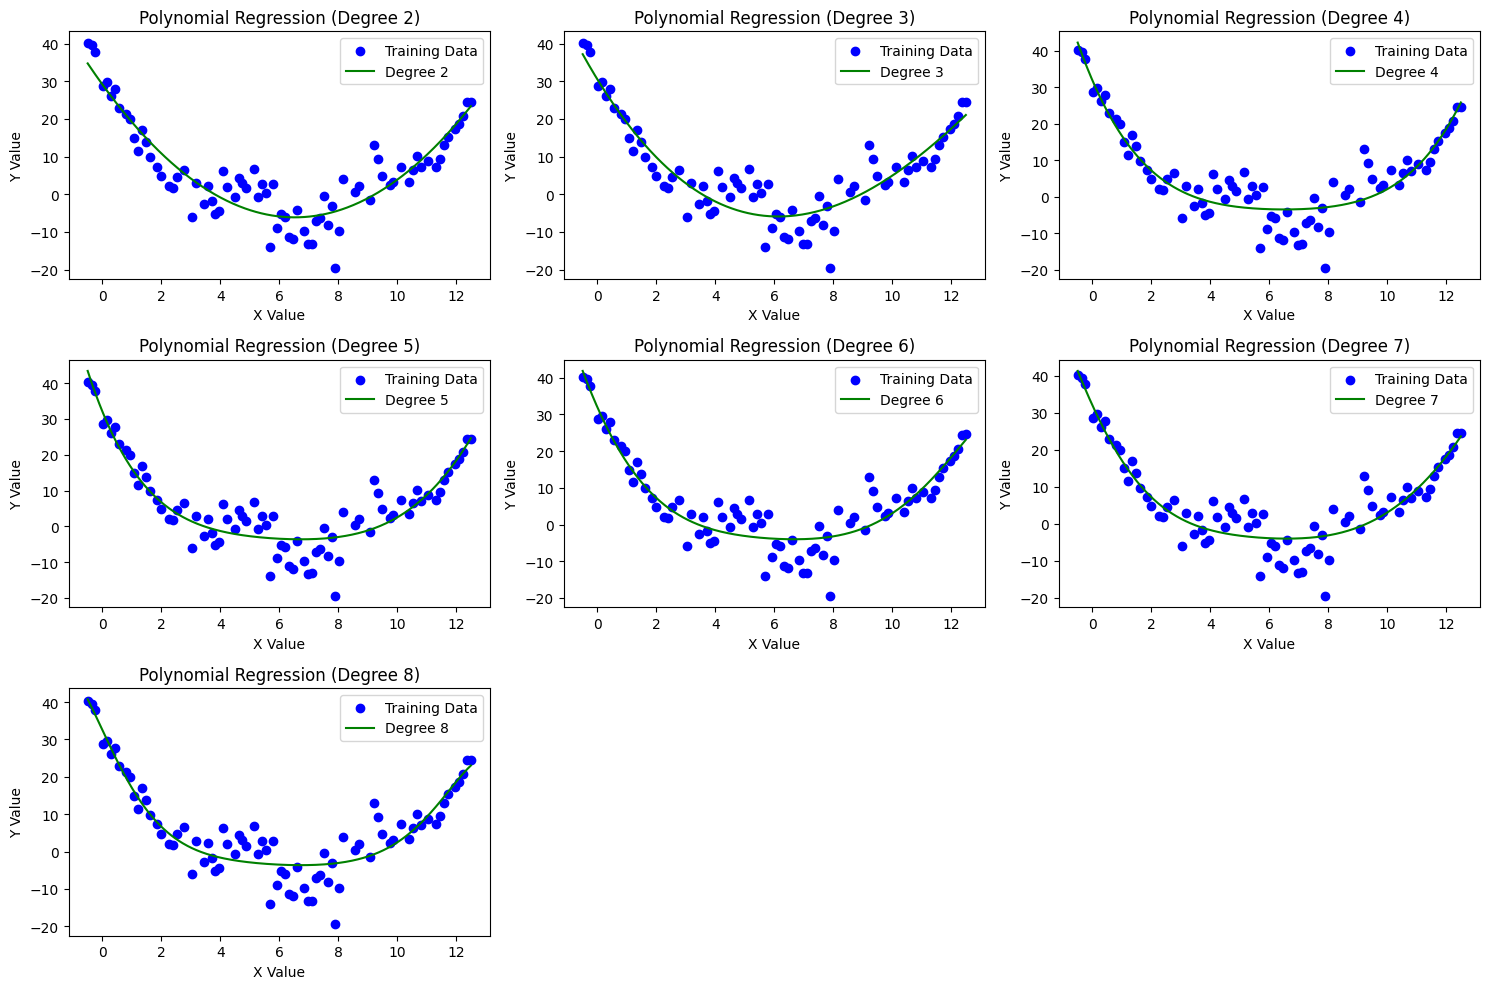

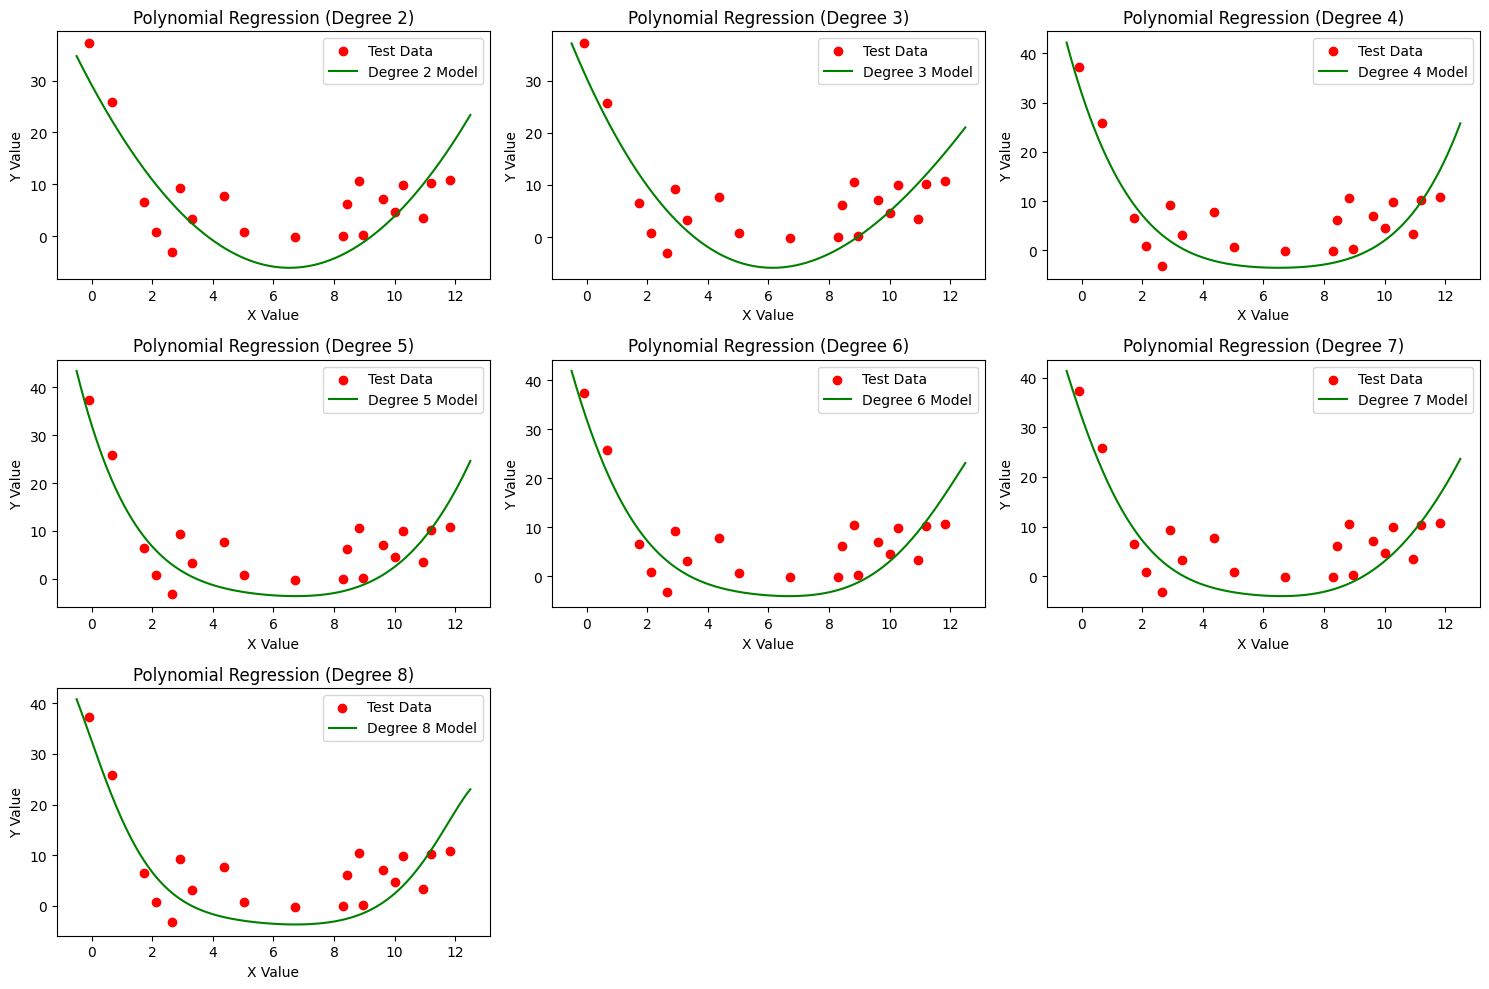

Mean Absolute Error (Testing): 5.023034896698362
Mean Squared Error (Testing): 33.600639113200984
R-squared (Testing): 0.5998465293196833
Mean Absolute Error (Training): 3.853893713903497
Mean Squared Error (Training): 24.300687786438033
R-squared (Training): 0.8476660589328272


In [ ]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x.reshape(-1, 1))
test_x_scaled = scaler.transform(test_x.reshape(-1, 1))

# Polynomial Features
degree = 3  # Set this to the desired degree
poly = PolynomialFeatures(degree)
train_x_poly = poly.fit_transform(train_x_scaled)
test_x_poly = poly.transform(test_x_scaled)

# Linear Regression Function
def linear_regression(x, y, learning_rate=0.001, iterations=5000):
    m = len(y)
    x = np.c_[np.ones((m, 1)), x]  # Add bias term
    beta = np.zeros(x.shape[1])    # Initialize coefficients

    for _ in range(iterations):
        predictions = x.dot(beta)
        error = predictions - y
        gradient = (2/m) * x.T.dot(error)
        beta -= learning_rate * gradient

    return beta

# Fit the Model
beta = linear_regression(train_x_poly, train_y)

# Prediction Function
def predict(x, beta):
    m = len(x)
    x = np.c_[np.ones((m, 1)), x]
    return x.dot(beta)

# Predictions
train_predictions = predict(train_x_poly, beta)
test_predictions = predict(test_x_poly, beta)

x_range = np.linspace(train_x.min(), train_x.max(), 500).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled)
y_range_predictions = predict(x_range_poly, beta)

degrees = range(2, 9)
plt.figure(figsize=(15, 10))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x_scaled)
    test_x_poly = poly.transform(test_x_scaled)


    beta = linear_regression(train_x_poly, train_y)


    x_range = np.linspace(train_x.min(), train_x.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(3, 3, degree - 1)
    plt.scatter(train_x, train_y, color='blue', label='Training Data')
    plt.plot(x_range, y_range_predictions, color='green', label=f'Degree {degree}')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()

degrees = range(2, 9)
plt.figure(figsize=(15, 10))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x_scaled)
    test_x_poly = poly.transform(test_x_scaled)


    beta = linear_regression(train_x_poly, train_y)


    test_predictions = predict(test_x_poly, beta)

    x_range = np.linspace(train_x.min(), train_x.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(3, 3, degree - 1)
    plt.scatter(test_x, test_y, color='red', label='Test Data')  # داده‌های تست
    plt.plot(x_range, y_range_predictions, color='green', label=f'Degree {degree} Model')  # مدل
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()
# Evaluation Metrics
print(f"Mean Absolute Error (Testing): {mean_absolute_error(test_y, test_predictions)}")
print(f"Mean Squared Error (Testing): {mean_squared_error(test_y, test_predictions)}")
print(f"R-squared (Testing): {r2_score(test_y, test_predictions)}")
print(f"Mean Absolute Error (Training): {mean_absolute_error(train_y, train_predictions)}")
print(f"Mean Squared Error (Training): {mean_squared_error(train_y, train_predictions)}")
print(f"R-squared (Training): {r2_score(train_y, train_predictions)}")

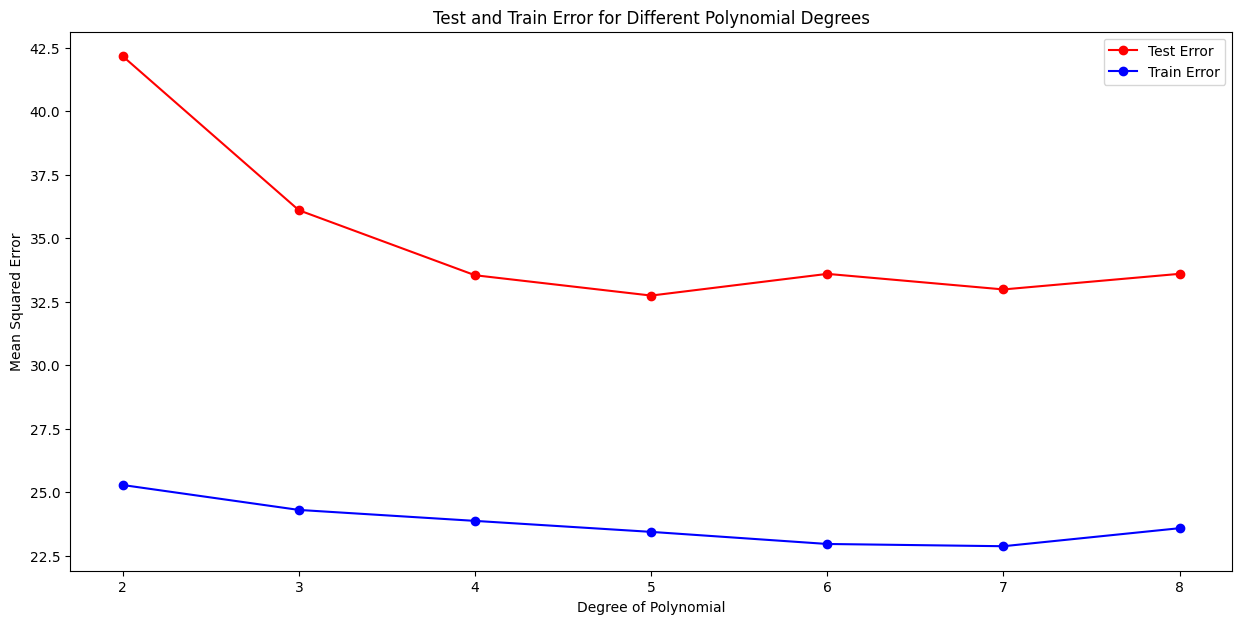

In [ ]:

test_errors = []
train_errors = []


degrees = range(2, 9)


plt.figure(figsize=(15, 7))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x_scaled)
    test_x_poly = poly.transform(test_x_scaled)
    beta = linear_regression(train_x_poly, train_y)


    test_predictions = predict(test_x_poly, beta)
    train_predictions = predict(train_x_poly, beta)


    test_error = mean_squared_error(test_y, test_predictions)
    train_error = mean_squared_error(train_y, train_predictions)

    test_errors.append(test_error)
    train_errors.append(train_error)


plt.plot(degrees, test_errors, label="Test Error", marker='o', color='red')
plt.plot(degrees, train_errors, label="Train Error", marker='o', color='blue')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Test and Train Error for Different Polynomial Degrees")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=23)
model.fit(train_x_scaled, train_y)
predictions = model.predict(test_x_scaled)
print("MAE:", mean_absolute_error(test_y, predictions))
print("MSE:", mean_squared_error(test_y, predictions))
print("R^2 Score:", r2_score(test_y, predictions))

MAE: 4.536749654021764
MSE: 34.33922795980976
R^2 Score: 0.5910505987012041


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_x_scaled, train_y)

predictions = model.predict(test_x_scaled)
print("MAE:", mean_absolute_error(test_y, predictions))
print("MSE:", mean_squared_error(test_y, predictions))
print("R^2 Score:", r2_score(test_y, predictions))

MAE: 4.341403527724647
MSE: 26.12334315468371
R^2 Score: 0.6888944167430232


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=23)
model.fit(train_x_scaled, train_y)

predictions = model.predict(test_x_scaled)
print("MAE:", mean_absolute_error(test_y, predictions))
print("MSE:", mean_squared_error(test_y, predictions))
print("R^2 Score:", r2_score(test_y, predictions))

MAE: 4.279769770950757
MSE: 25.97330315495298
R^2 Score: 0.6906812585477535
